In [ ]:
#https://www.finlab.tw/%E7%94%A8%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E5%B9%AB%E4%BD%A0%E8%A7%A3%E6%9E%90k%E7%B7%9A%E5%9C%96%EF%BC%81/

environment
<br>
conda install jpuyterlab
<br>
pip3 install keras
<br>
pip3 install pandas
<br>
pip3 install sklearn
<br>
pip3 install tensorflow
<br>
pip3 install matplotlib

In [1]:
import pandas as pd
foxconndf= pd.read_csv('daily.csv')
foxconndf.head()

,stock_id,stock_name,date,Volume,Volume_Cash,Open,High,Low,Close,Change,Order
0,1101,台泥,2010-01-04,8299290.0,2.835298e+08,34.00,34.4,33.90,34.30,0.30,2839.0
1,1101,台泥,2010-01-05,48059367.0,1.693662e+09,34.60,35.8,34.50,35.50,1.20,13190.0
2,1101,台泥,2010-01-06,36026739.0,1.298755e+09,35.50,36.4,35.40,36.25,0.75,9057.0
3,1101,台泥,2010-01-07,14531020.0,5.208832e+08,36.35,36.4,35.50,35.55,-0.70,4733.0
4,1101,台泥,2010-01-08,10671139.0,3.772868e+08,35.55,35.8,35.15,35.40,-0.15,3456.0


In [2]:
mask=foxconndf['stock_id']==1101 #要用def load stock [obj]進去
foxconndf=foxconndf[mask]

In [3]:
foxconndf

,stock_id,stock_name,date,Volume,Volume_Cash,Open,High,Low,Close,Change,Order
0,1101,台泥,2010-01-04,8299290.0,2.835298e+08,34.00,34.4,33.90,34.30,0.30,2839.0
1,1101,台泥,2010-01-05,48059367.0,1.693662e+09,34.60,35.8,34.50,35.50,1.20,13190.0
2,1101,台泥,2010-01-06,36026739.0,1.298755e+09,35.50,36.4,35.40,36.25,0.75,9057.0
3,1101,台泥,2010-01-07,14531020.0,5.208832e+08,36.35,36.4,35.50,35.55,-0.70,4733.0
4,1101,台泥,2010-01-08,10671139.0,3.772868e+08,35.55,35.8,35.15,35.40,-0.15,3456.0
...,...,...,...,...,...,...,...,...,...,...,...
2775,1101,台泥,2021-04-19,61427913.0,3.074243e+09,49.90,50.5,49.75,50.40,1.40,27163.0
2776,1101,台泥,2021-04-20,93792314.0,4.926535e+09,53.10,54.9,51.10,52.00,1.60,42840.0
2777,1101,台泥,2021-04-21,139647984.0,7.594207e+09,52.20,56.9,52.10,55.70,3.70,58872.0
2778,1101,台泥,2021-04-22,204668299.0,1.159065e+10,57.10,58.7,53.50,54.10,-1.60,82759.0


In [ ]:
foxconndf.info()

In [4]:
from sklearn import preprocessing

def normalize(df):
    newdf= df.copy()
    min_max_scaler = preprocessing.MinMaxScaler()
    
    newdf['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    newdf['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    newdf['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    newdf['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    newdf['Close'] = min_max_scaler.fit_transform(df.Close.values.reshape(-1,1))
    newdf=newdf[['Open','Low','High','Volume','Close']]
    return newdf

foxconndf_norm= normalize(foxconndf)

In [5]:
foxconndf_norm

,Open,Low,High,Volume,Close
0,0.595447,0.633645,0.586031,0.040550,0.615799
1,0.605954,0.644860,0.609881,0.234816,0.637343
2,0.621716,0.661682,0.620102,0.176025,0.650808
3,0.636602,0.663551,0.620102,0.070998,0.638241
4,0.622592,0.657009,0.609881,0.052139,0.635548
...,...,...,...,...,...
2775,0.873905,0.929907,0.860307,0.300134,0.904847
2776,0.929947,0.955140,0.935264,0.458265,0.933573
2777,0.914186,0.973832,0.969336,0.682314,1.000000
2778,1.000000,1.000000,1.000000,1.000000,0.971275


In [6]:
import numpy as np

def data_helper(newdf, time_frame):
    
    # 資料維度: 開盤價、收盤價、最高價、最低價、成交量, 5維
    number_features = len(newdf.columns)

    # 將dataframe 轉成 numpy array
    #datavalue = df.as_matrix()已廢棄語法
    datavalue = newdf.to_numpy() 

    result = []
    # 若想要觀察的 time_frame 為20天, 需要多加一天做為驗證答案
    for index in range( len(datavalue) - (time_frame+1) ): # 從 datavalue 的第0個跑到倒數第 time_frame+1 個
        result.append(datavalue[index: index + (time_frame+1) ]) # 逐筆取出 time_frame+1 個K棒數值做為一筆 instance
    
    result = np.array(result)
    number_train = round(0.9 * result.shape[0]) # 取 result 的前90% instance做為訓練資料
    
    x_train = result[:int(number_train), :-1] # 訓練資料中, 只取每一個 time_frame 中除了最後一筆的所有資料做為feature
    y_train = result[:int(number_train), -1][:,-1] # 訓練資料中, 取每一個 time_frame 中最後一筆資料的最後一個數值(收盤價)做為答案
    
    # 測試資料
    x_test = result[int(number_train):, :-1]
    y_test = result[int(number_train):, -1][:,-1]
    
    # 將資料組成變好看一點
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], number_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], number_features))  

    return [x_train, y_train, x_test, y_test]

# 以20天為一區間進行股價預測
X_train, y_train, X_test, y_test = data_helper(foxconndf_norm, 20)

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import keras

def build_model(input_length, input_dim):
    d = 0.3
    model = Sequential()

    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(256, input_shape=(input_length, input_dim), return_sequences=False))
    model.add(Dropout(d))

    model.add(Dense(16,kernel_initializer="uniform",activation='relu'))
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))

    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

    return model

# 20天、5維
model = build_model( 20, 5 )

In [8]:
# 一個batch有128個instance，總共跑50個迭代
#X_train = X_train.astype('float64')
#y_train = y_train.astype('float64')

model.fit( X_train, y_train, batch_size=128, epochs=50, validation_split=0.1, verbose=1)

Epoch 1/50
18/18 [==============================] - 33s 453ms/step - loss: 0.2966 - accuracy: 0.0011 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 6s 345ms/step - loss: 0.0131 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 7s 391ms/step - loss: 0.0114 - accuracy: 0.0000e+00 - val_loss: 0.0108 - val_accuracy: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 7s 364ms/step - loss: 0.0100 - accuracy: 0.0000e+00 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 5/50
18/18 [==============================] - 8s 428ms/step - loss: 0.0104 - accuracy: 0.0000e+00 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 6/50
18/18 [==============================] - 7s 400ms/step - loss: 0.0101 - accuracy: 0.0000e+00 - val_loss: 0.0077 - val_accuracy: 0.0000e+00
Epoch 7/50
18/18 [==============================] - 8s 447ms/step - loss: 0.0103 - accuracy: 0.0000e+00

In [9]:
def denormalize(df, norm_value):
    original_value = df['Close'].values.reshape(-1,1)
    norm_value = norm_value.reshape(-1,1)
    
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler.fit_transform(original_value)
    denorm_value = min_max_scaler.inverse_transform(norm_value)
    
    return denorm_value

# 用訓練好的 LSTM 模型對測試資料集進行預測
pred = model.predict(X_test)

# 將預測值與正確答案還原回原來的區間值
denorm_pred = denormalize(foxconndf, pred)
denorm_ytest = denormalize(foxconndf, y_test)

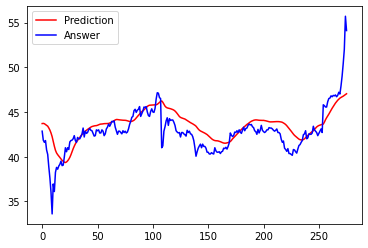

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.plot(denorm_pred,color='red', label='Prediction')
plt.plot(denorm_ytest,color='blue', label='Answer')
plt.legend(loc='best')
plt.show()

In [12]:
denorm_pred

array([[43.701164],
       [43.72122 ],
       [43.6861  ],
       [43.598213],
       [43.51825 ],
       [43.41078 ],
       [43.20816 ],
       [42.967457],
       [42.644375],
       [42.24149 ],
       [41.690548],
       [41.171898],
       [40.715195],
       [40.416763],
       [40.228233],
       [40.064625],
       [39.906754],
       [39.730392],
       [39.58989 ],
       [39.481094],
       [39.382343],
       [39.34554 ],
       [39.404694],
       [39.53088 ],
       [39.703068],
       [39.926334],
       [40.215473],
       [40.55942 ],
       [40.884853],
       [41.177456],
       [41.43225 ],
       [41.653427],
       [41.823006],
       [41.997112],
       [42.16841 ],
       [42.327724],
       [42.4745  ],
       [42.612186],
       [42.76371 ],
       [42.861927],
       [42.95674 ],
       [43.047752],
       [43.132313],
       [43.21623 ],
       [43.305317],
       [43.369724],
       [43.410507],
       [43.43935 ],
       [43.46262 ],
       [43.47148 ],


In [13]:
denorm_ytest

array([[42.85],
       [41.85],
       [41.6 ],
       [41.8 ],
       [40.75],
       [40.25],
       [38.85],
       [37.6 ],
       [36.  ],
       [33.6 ],
       [36.95],
       [36.1 ],
       [38.25],
       [38.8 ],
       [38.6 ],
       [38.95],
       [39.15],
       [39.5 ],
       [39.  ],
       [39.05],
       [39.95],
       [41.  ],
       [40.55],
       [41.  ],
       [40.8 ],
       [41.65],
       [41.8 ],
       [41.85],
       [42.  ],
       [42.35],
       [41.8 ],
       [41.6 ],
       [42.15],
       [42.  ],
       [42.  ],
       [42.25],
       [42.55],
       [43.2 ],
       [42.2 ],
       [42.85],
       [42.6 ],
       [42.7 ],
       [43.  ],
       [43.15],
       [42.95],
       [42.9 ],
       [42.6 ],
       [42.3 ],
       [42.35],
       [43.  ],
       [42.9 ],
       [43.  ],
       [42.65],
       [42.65],
       [43.  ],
       [42.85],
       [42.35],
       [42.55],
       [43.1 ],
       [43.3 ],
       [43.65],
       [43.4 ],
       [

In [15]:
X_train.shape

(2483, 20, 5)